In [28]:
import modules.plots as plots
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import json
from modules.plots import plot_elbo, plot_rmse, plot_distribution, plot_comparison_grid


In [36]:
EXPERIMENT_NAME = "model-test"
PROFILE_NAME = "five-layer-sum"
DIR = f"./experiments/{EXPERIMENT_NAME}/{PROFILE_NAME}"

In [37]:
# Load train stats and results json
with open(f"{DIR}/model/train_stats.json") as f:
    train_stats = json.load(f)

with open(f"{DIR}/results/results.json") as f:
    results = json.load(f)

# Load posterior samples
baseline_normal_samples = np.loadtxt(f"{DIR}/results/baseline_normal_samples.csv", delimiter=",")
data_samples = np.loadtxt(f"{DIR}/results/data_samples.csv", delimiter=",")
pred_samples = np.loadtxt(f"{DIR}/results/predictive_samples.csv", delimiter=",")

print(data_samples.shape)
print(np.min(data_samples), np.max(data_samples))
print(pred_samples.shape)
print(np.min(pred_samples), np.max(pred_samples))


(1000, 20)
-1065.9168701171875 346.51348876953125
(1000, 20)
-474812.59375 559590.1875


In [38]:
train_stats

{'elbo_minibatch': [341531488010.97406,
  437016688286129.3,
  6974466902644.133,
  596759168309.1571,
  1606050723291.0586,
  1045454663359.3135,
  53968667204.34238,
  1259663336947.36,
  55612247367.41693,
  953783227695.9353,
  1025304628098.7218,
  6780888023.166393,
  50446772721.91133,
  2800061711652.362,
  505234687768.57764,
  542840258049.3278,
  175424863778.0159,
  3050939804048.6685,
  373874089989.24445,
  68914753790.36499,
  629879266307.065,
  961737839873.8062,
  544422909907.43134,
  112846783736.92561,
  17552960219.40309,
  1937285499193.03,
  1074169297779.8949,
  65061110202.82811,
  19505806180.658836,
  56981739248.79532,
  362243731375.7833,
  479026979953.312,
  453850013129.4984,
  1522417671.451438,
  70623334306.49057,
  6725488736.0765505,
  21579053947.992504,
  227759737462.47202,
  321989145581.85455,
  76674733224.9016,
  6467076200.241094,
  308525886926.8554,
  1215422238.4691458,
  25089664083.345695,
  221534806417.57733,
  29485722577.2006,
  82

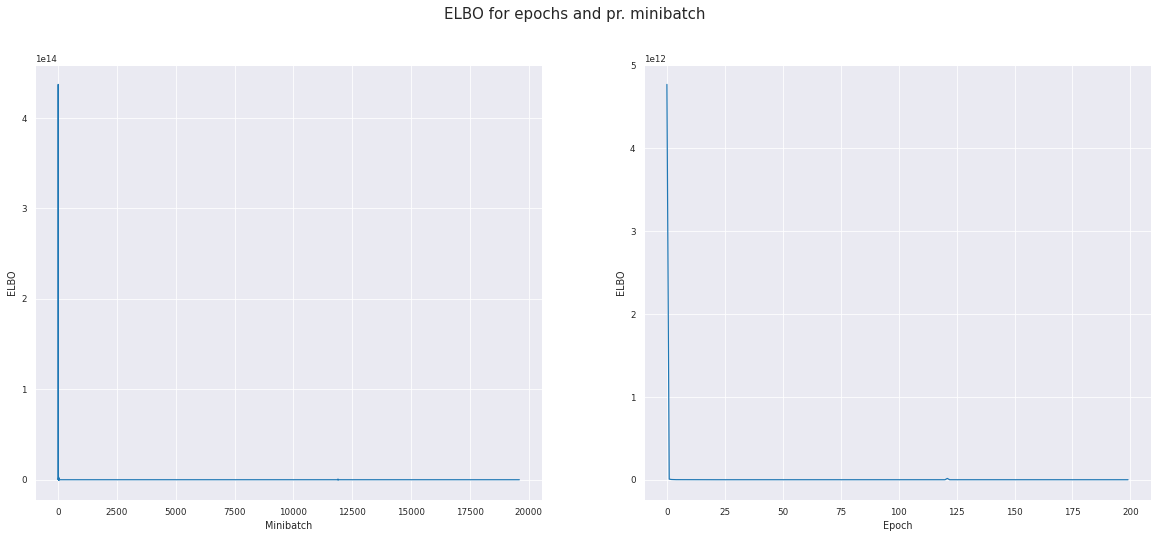

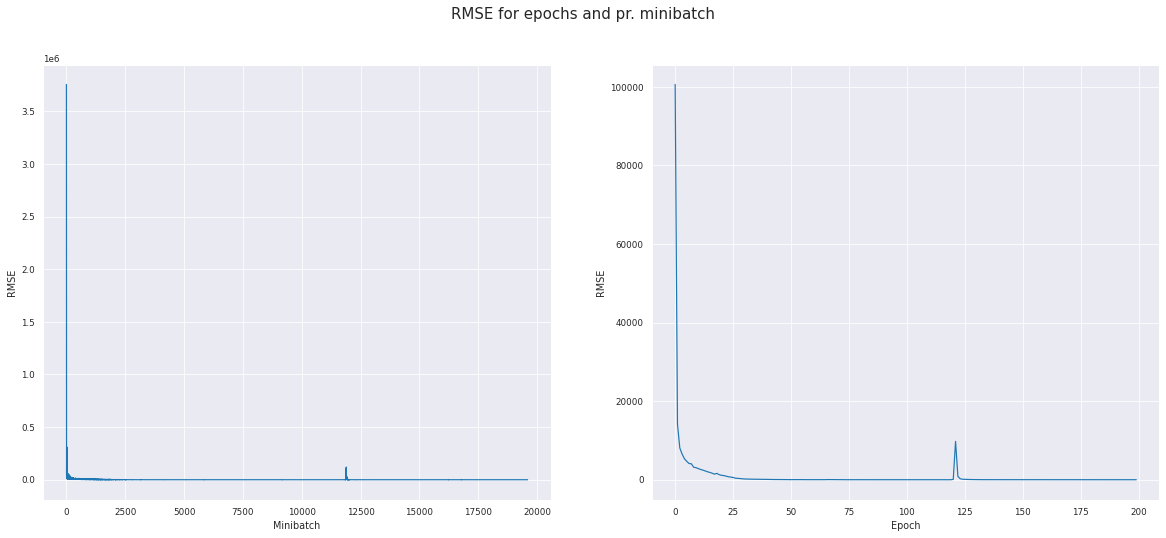

In [39]:
# Plot elbo with seaborn
plot_elbo(train_stats)
plot_rmse(train_stats)

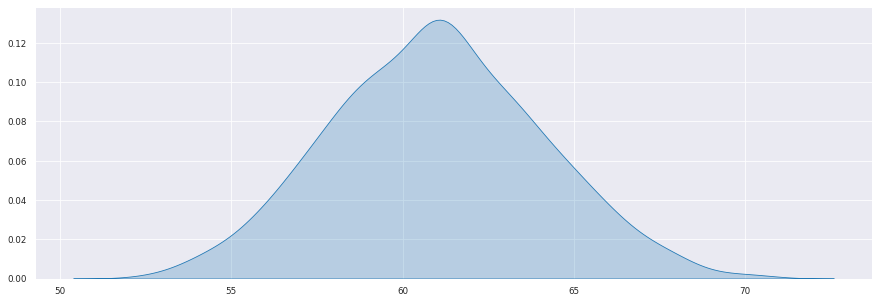

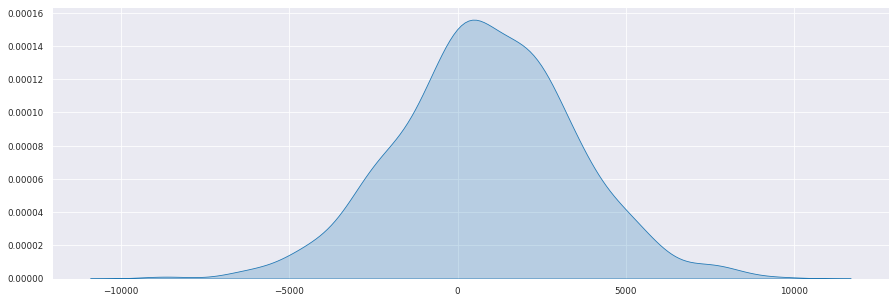

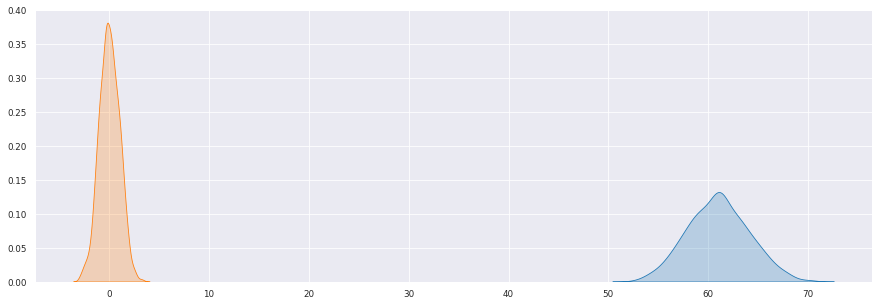

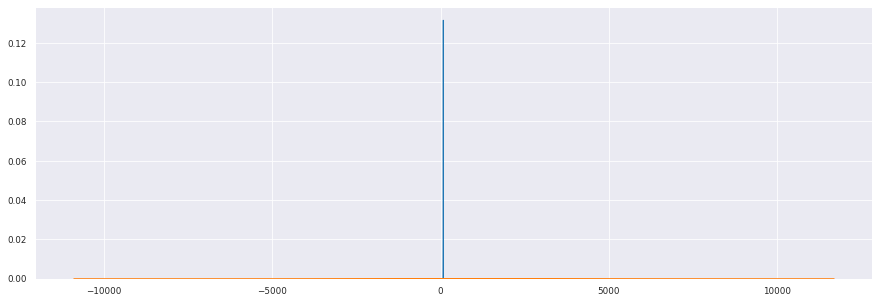

In [32]:
i = 0
plots.plot_distribution(data_samples[:, i], figsize=(15, 5))
plots.plot_distribution(pred_samples[:, i], figsize=(15, 5))

plots.plot_comparison(baseline_normal_samples[:, i], data_samples[:, i], figsize=(15, 5))
plots.plot_comparison(pred_samples[:, i], data_samples[:, i], figsize=(15, 5))